<a href="https://colab.research.google.com/github/Yedoprada245/cd_202202_erwing_prada/blob/main/Taller_5_Regresiones__lineales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import pearsonr, zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [ ]:
#Datos de hoteles
ruta = 'https://raw.githubusercontent.com/rpizarrog/FundamentosMachineLearning/master/datos/melb_data.csv'
df = pd.read_csv(ruta)

In [ ]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
df = df.select_dtypes(exclude=['object'])

In [ ]:
#Buscar nulos
df.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

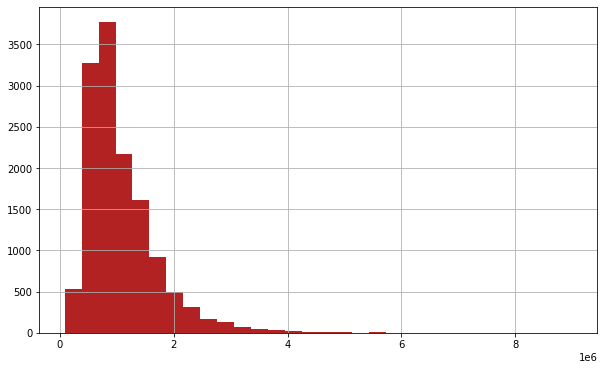

In [ ]:
#Histograma
df.Price.hist(color='firebrick', bins=30, figsize=(10, 6))

In [ ]:
#Borrado de datos nulos
df = df.dropna()
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [ ]:
#Datos con área menor o igual a 800
df0 = df[df["BuildingArea"]<=800]

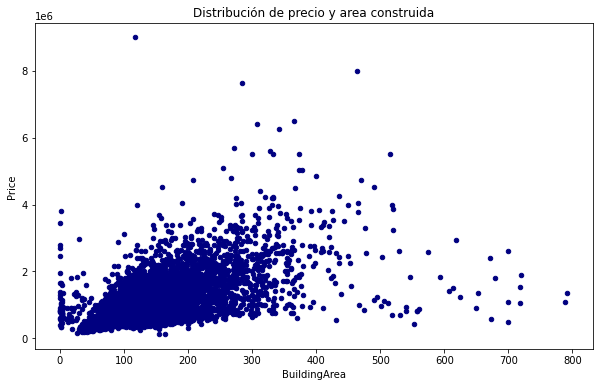

In [ ]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df0.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [ ]:
#Datos con área cero
dfzero = df0[df0["BuildingArea"]<=15]
len(dfzero)

56

In [ ]:
#Se eliminan los registros de menos de 15 mts cuadrados de area
df0 = df0[df0["BuildingArea"]>15]

In [ ]:
#Se eliminan todos los datos que estén más allá de 3 desviaciones estándar
#df0 = df0[(np.abs(zscore(df0['BuildingArea']))<=3)]
df0 = df0[(np.abs(zscore(df0['Price']))<=3)]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


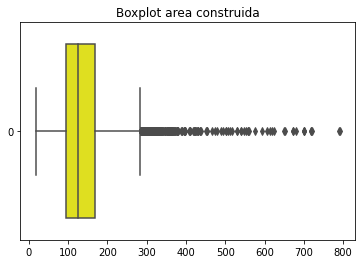

In [ ]:
#Boxplot
ax = sb.boxplot(data=df0['BuildingArea'].values, orient='h', color='yellow')
ax.set_title('Boxplot area construida');
plt.show()

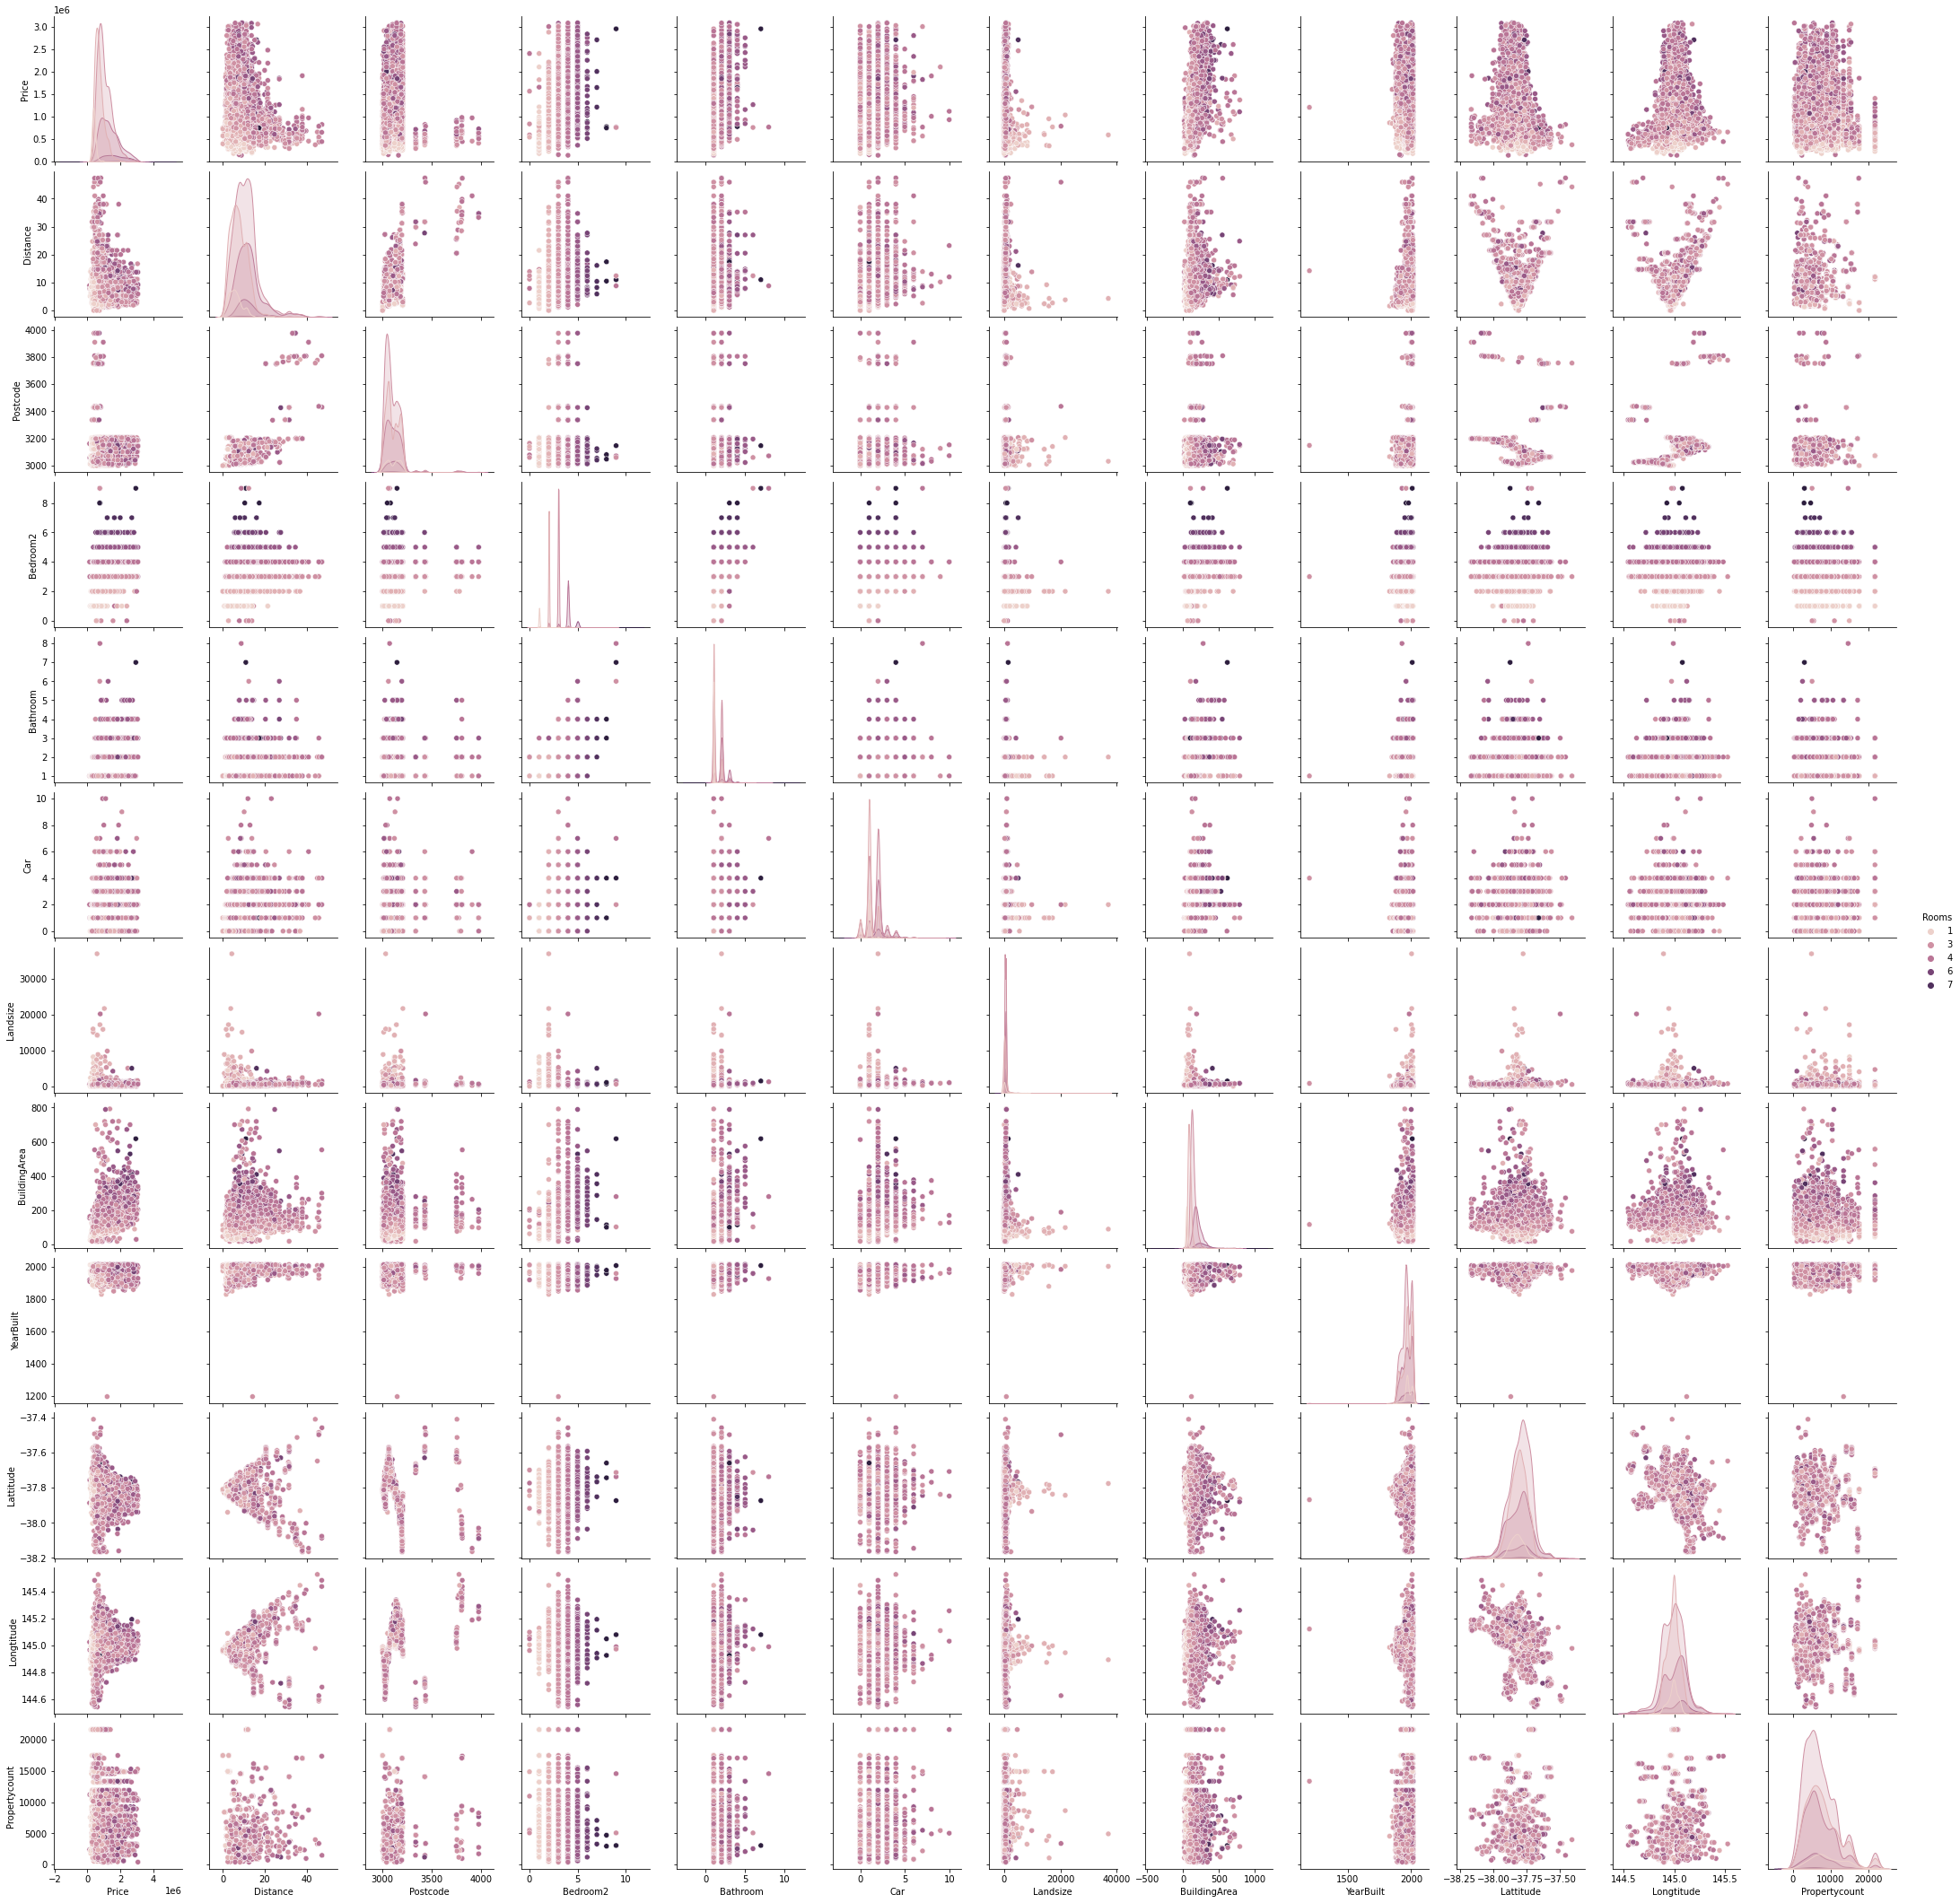

In [ ]:
#Múltiples diagramas por parejas
#sb.set_theme(style="ticks")
sb.pairplot(df0, hue='Rooms')

In [ ]:
#Correlación entre variables
corr_test = pearsonr(x = df['BuildingArea'], y = df['Price'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.5204915813803511
P-value:  0.0


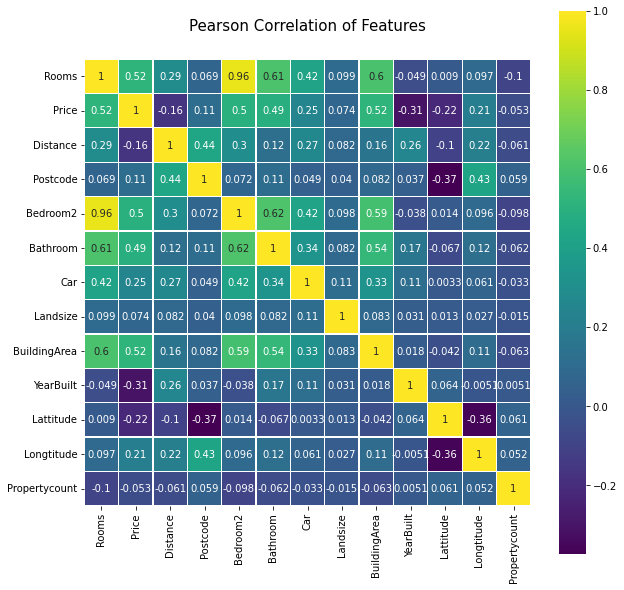

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
df1 = df.copy()
for columna in df1:
  df1 = df1[(np.abs(zscore(df1[columna]))<=3)]

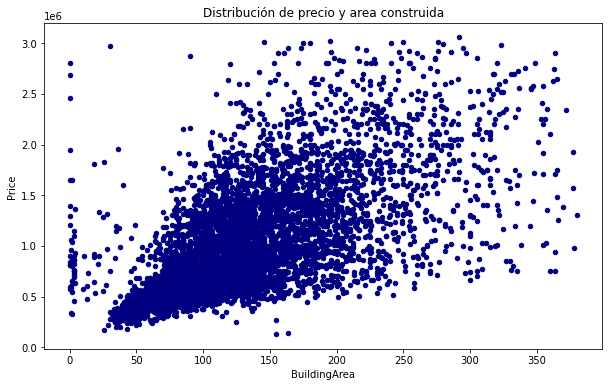

In [ ]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df1.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

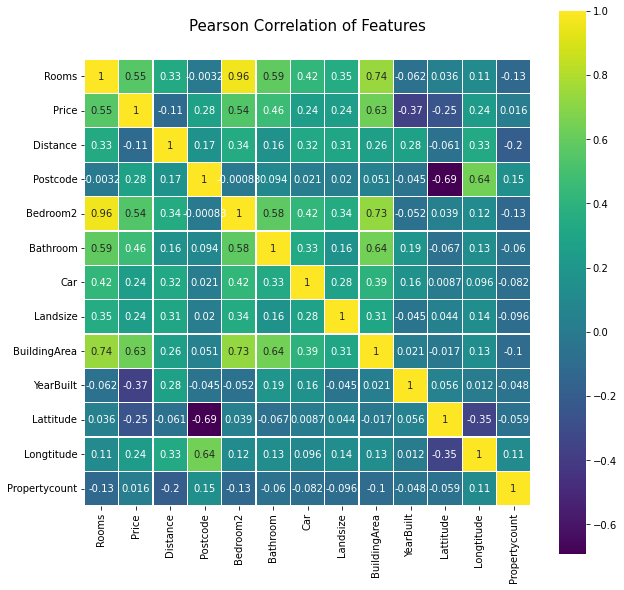

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df1.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

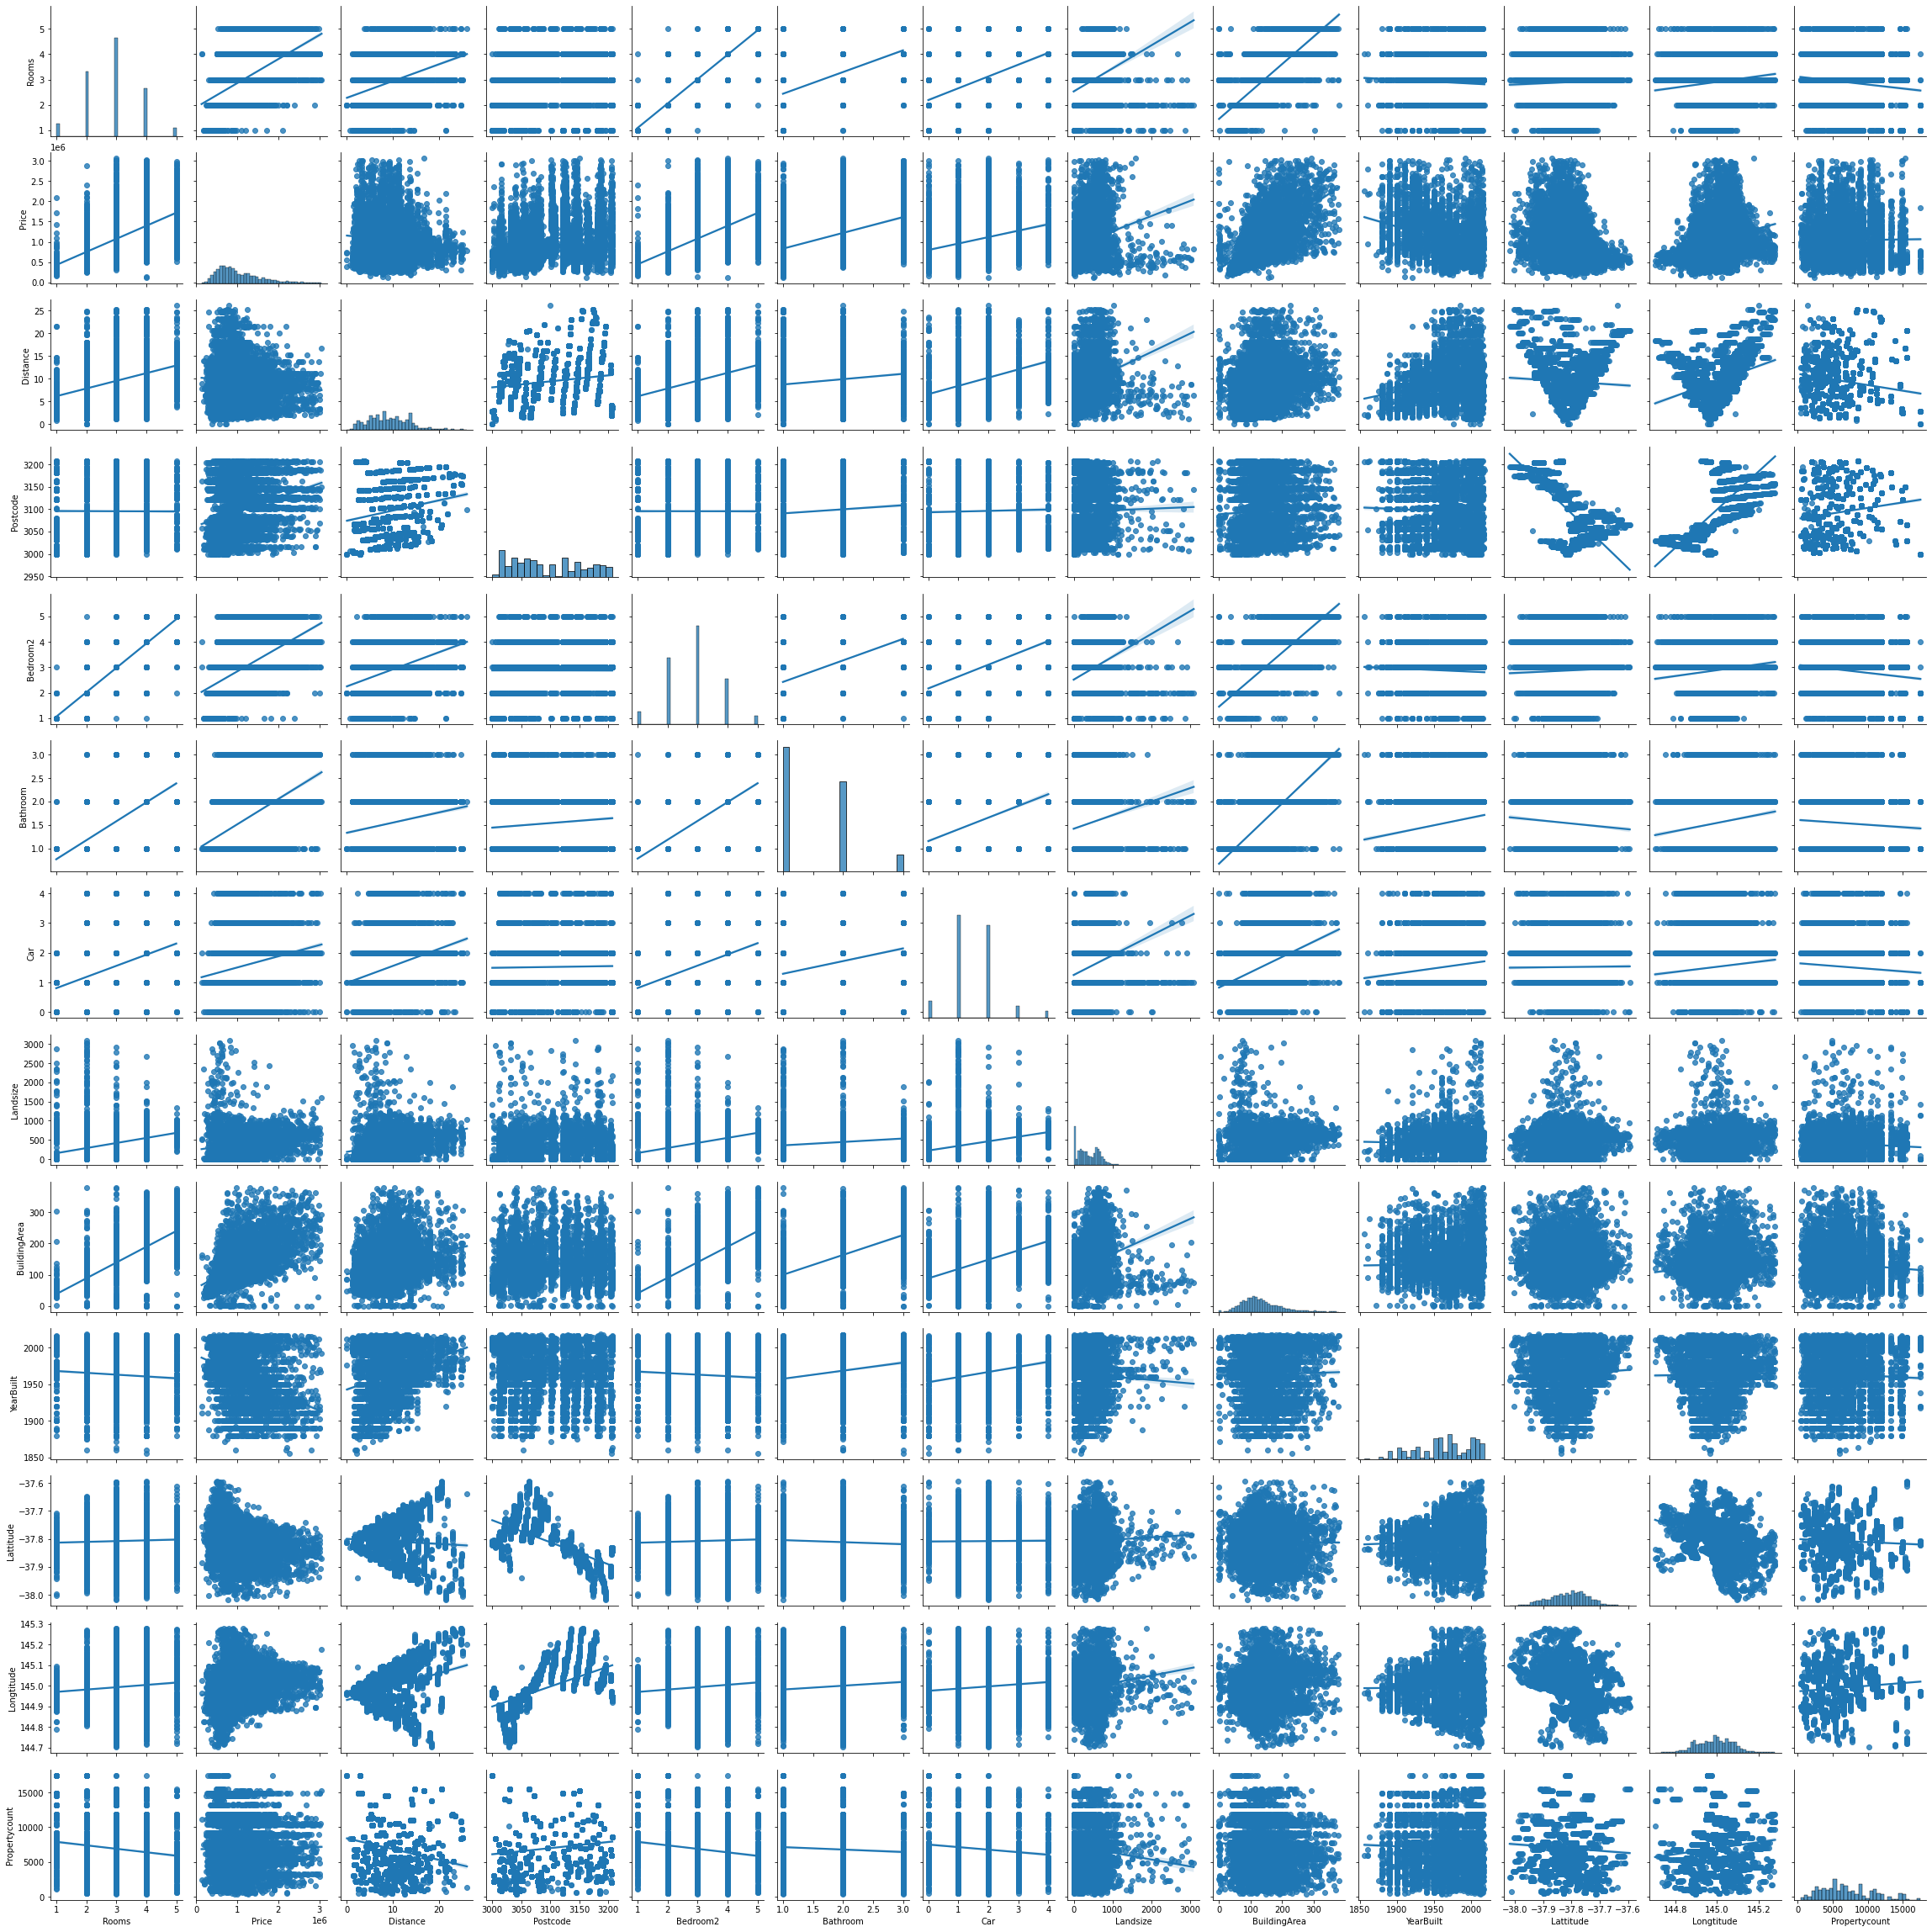

In [ ]:
sb.pairplot(df1, kind='reg')

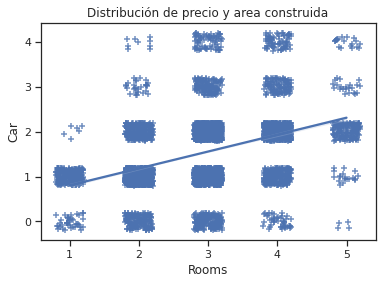

In [ ]:
sb.set_theme(color_codes=True)
sb.set_theme(style="ticks")
ax = sb.regplot(x="Rooms", y="Car", data=df1, marker='+', x_jitter=0.2, y_jitter=0.2)
ax.set_title('Distribución de precio y area construida');

In [ ]:
#Regresión lineal (Area construida vs. Precio)
x = df1["BuildingArea"]
y = df1["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     3877.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:41:34   Log-Likelihood:                -86205.
No. Observations:                6005   AIC:                         1.724e+05
Df Residuals:                    6003   BIC:                         1.724e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.254e+05   1.27e+04     25.652   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
df1.dtypes

Rooms              int64
Price            float64
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Lattitude        float64
Longtitude       float64
Propertycount    float64
dtype: object

In [ ]:
#Regresión lineal múltiple
#x = df1.iloc[:,[0,2,4,5,6,7,8,9,12]]
x = df1.iloc[:,[2,4,5,6,7,8,9,12]]
y = df1["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     1185.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:41:34   Log-Likelihood:                -84854.
No. Observations:                6005   AIC:                         1.697e+05
Df Residuals:                    5996   BIC:                         1.698e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.876e+06   2.55e+05     38.709

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Predicciones con scikit-learn
train, test = train_test_split(df1, test_size = 0.10)
print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  5404
Ejemplos usados para test:  601


In [ ]:
#Se definen las variables
x_train = train.iloc[:,[2,4,5,6,7,8,9,12]]
y_train = train.Price
x_test = test.iloc[:,[2,4,5,6,7,8,9,12]]
y_test = test.Price

In [ ]:
#Entrenamiento del modelo
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_train

9753     1050000.0
8724      900000.0
5354     1695000.0
6718     1287000.0
6423      765000.0
           ...    
10217     570000.0
3887      960000.0
7164     1401000.0
7192     1535000.0
9450      310000.0
Name: Price, Length: 5404, dtype: float64

In [ ]:
#Predicción
y_pred = regr.predict(x_train)
y_pred

array([1159083.5893762 ,  940572.67528034, 1497956.06813156, ...,
       1210351.25895167, 1091188.57034203,  314064.20456561])

In [ ]:
print('Coeficientes:\n', regr.coef_)
print("Error cuadrático medio (Mean squared error): %.2f" % mean_squared_error(y_train, y_pred))
print('Varianza: %.2f' % r2_score(y_train, y_pred))
print('w = ' + str(regr.coef_) + ', b = ' + str(regr.intercept_))

Coeficientes:
 [-2.74168968e+04  7.69025289e+04  1.46868184e+05  4.73042816e+04
  1.19499164e+02  3.76143909e+03 -4.92825509e+03  5.40552190e+00]
Error cuadrático medio (Mean squared error): 109449010603.02
Varianza: 0.62
w = [-2.74168968e+04  7.69025289e+04  1.46868184e+05  4.73042816e+04
  1.19499164e+02  3.76143909e+03 -4.92825509e+03  5.40552190e+00], b = 9863684.278546931


In [ ]:
predicciones = regr.predict(x_train)
for y, y_pred in list(zip(y_train, predicciones)) [:10]:
    print("Valor real: {:.2f} - Valor estimado: {:.2f}".format(y, y_pred))

Valor real: 1050000.00 - Valor estimado: 1159083.59
Valor real: 900000.00 - Valor estimado: 940572.68
Valor real: 1695000.00 - Valor estimado: 1497956.07
Valor real: 1287000.00 - Valor estimado: 1827961.69
Valor real: 765000.00 - Valor estimado: 830529.81
Valor real: 1350000.00 - Valor estimado: 1708498.89
Valor real: 1512000.00 - Valor estimado: 1278189.51
Valor real: 590000.00 - Valor estimado: 818867.83
Valor real: 1210000.00 - Valor estimado: 1330186.71
Valor real: 854000.00 - Valor estimado: 1000580.07


In [ ]:
predicciones = regr.predict(X=x_test)
print(predicciones[0:10,])
rmse = mean_squared_error(y_true=y_test, y_pred=predicciones, squared=False)
print(f"\nEl error (rmse) del test es: {rmse}")

[ 954714.61416421  700316.93042147  352667.91702553 1029577.87758266
 1081010.34481743  605478.2214086  1076033.95310951 1315536.50179825
  484534.1190149   624396.75225061]

El error (rmse) del test es: 338728.34767040185


In [ ]:
for index in range(df1.shape[1]):


  #df.iloc[:,index]
  x = df1.iloc[:,index]
  y = df1["Price"]
  x2 = sm.add_constant(x)
  est = sm.OLS(y, x2)
  est2 = est.fit()
  print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     2646.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:41:35   Log-Likelihood:                -86605.
No. Observations:                6005   AIC:                         1.732e+05
Df Residuals:                    6003   BIC:                         1.732e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.078e+05    1.9e+04      5.663      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     380.9
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           2.64e-82
Time:                        13:41:35   Log-Likelihood:                -87517.
No. Observations:                6005   AIC:                         1.750e+05
Df Residuals:                    6003   BIC:                         1.751e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.906e+05   1.02e+04     87.332      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


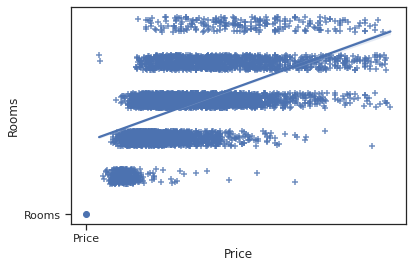

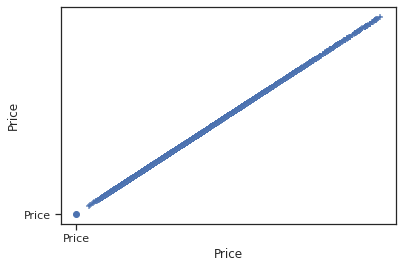

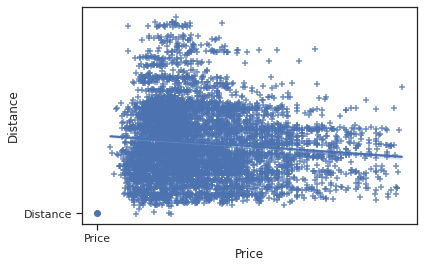

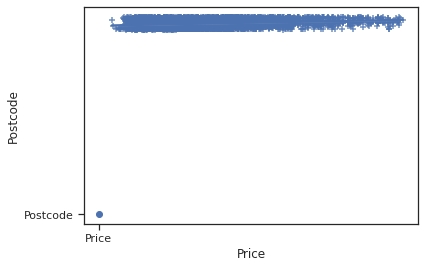

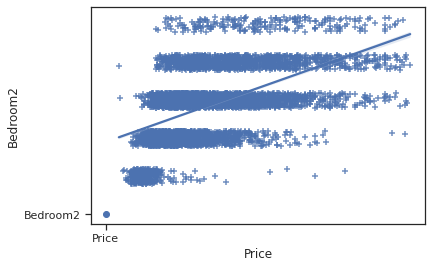

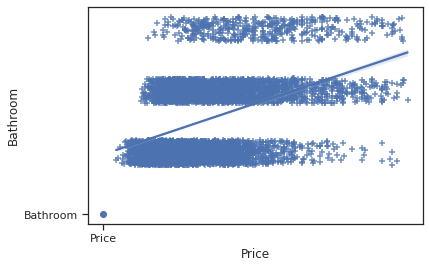

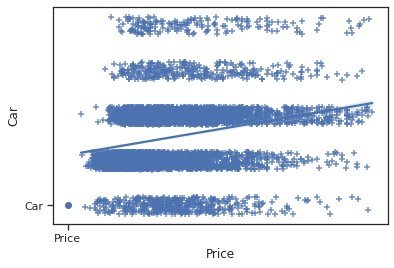

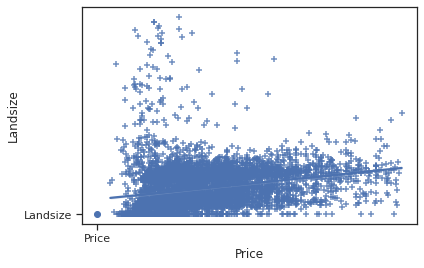

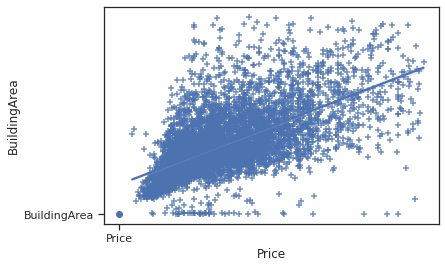

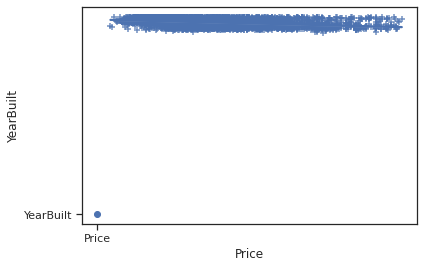

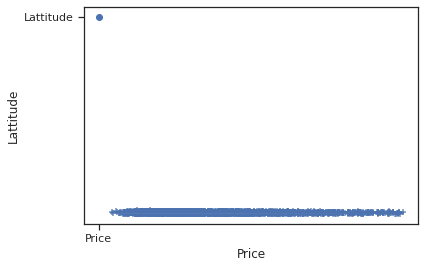

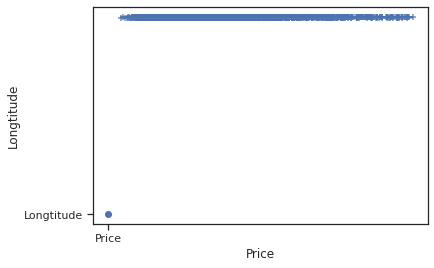

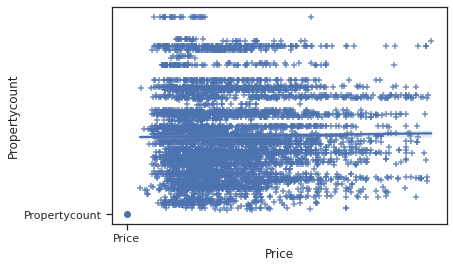

In [ ]:
for index in range(df1.shape[1]):

  plt.scatter(x="Price", y=df1.columns.values[index])
  ax = sb.regplot(x="Price", y=df1.columns.values[index], data=df1, marker='+', x_jitter=0.2, y_jitter=0.2)
  plt.show()